In [42]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl


# 그래프 기본 테마 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 복잡한 통계 처리를 위한 라이브러리
from scipy import stats
from matplotlib.ticker import ScalarFormatter


In [43]:
data = pd.read_csv('data/search.csv', encoding='euc-kr')
data.tail()

,순위,광역시/도,시/군/구,관광지명,검색건수,기준년도,지정년도,지정구분
33,18.0,경상북도,칠곡군,국립칠곡숲체원,5381.0,2223,2023,전
34,189.0,인천광역시,중구,현대요트인천지점,324.0,2223,2023,전
35,168.0,인천광역시,중구,현대요트인천지점,542.0,2324,2023,후
36,42.0,충청북도,제천시,국립제천치유의숲,2303.0,2223,2023,전
37,36.0,충청북도,제천시,국립제천치유의숲,2272.0,2324,2023,후


In [44]:
data[['순위', '검색건수']] = data[['순위', '검색건수']].astype("Int64")
data.head()

,순위,광역시/도,시/군/구,관광지명,검색건수,기준년도,지정년도,지정구분
0,2,강원특별자치도,원주시,오크밸리CC,86108,2324,2024,전
1,2,강원특별자치도,원주시,오크밸리CC,78334,2425,2024,후
2,<NA>,인천광역시,강화군,금풍양조장,<NA>,2324,2024,전
3,<NA>,인천광역시,강화군,금풍양조장,<NA>,2425,2024,후
4,10,충청북도,영동군,레인보우힐링센터,5053,2425,2024,후


In [45]:
# 필요한 열만 선택
df = data[["관광지명", '순위', '검색건수', '기준년도', '지정년도', '지정구분']]

# 전/후 데이터 분리
df_before = df[df['지정구분'] == '전'].rename(columns={'순위': '순위_전'})
df_after = df[df['지정구분'] == '후'].rename(columns={'순위': '순위_후'})

# 관광지명 + 지정년도 기준으로 merge
merged = pd.merge(df_before, df_after, on=['관광지명', '지정년도'], how='inner')

# 순위 변화 계산 (음수면 순위 상승, 양수면 하락)
merged['순위변화'] = merged['순위_전'] - merged['순위_후']

# 결과 정렬 (예: 순위 상승이 큰 순)
merged_sorted = merged.sort_values(by='순위변화', ascending=False)

# 상위 일부 확인
merged_sorted[['관광지명', '지정년도', '순위_전', '순위_후', '순위변화']]


,관광지명,지정년도,순위_전,순위_후,순위변화
9,JW메리어트제주,2024,61,26,35
17,현대요트인천지점,2023,189,168,21
14,하이힐링원,2023,56,38,18
15,숲애서,2023,88,70,18
18,국립제천치유의숲,2023,42,36,6
6,클럽디오아시스,2024,22,18,4
13,삼척활기자연휴양림,2023,41,37,4
8,쉴랜드,2024,16,13,3
16,국립칠곡숲체원,2023,18,15,3
2,레인보우힐링센터,2024,12,10,2


- 웰니스 관광 지정 이후 순위가 올라간 것을 확인할 수 있음.
- 다만 이게 웰니스 관광 지정의 독립적인 효과인지 아닌지에 대해서 확인할 수 있는 데이터는 없음.
- 웰니스 지정이 어느 정도 효과가 있었다고 추측하는 수밖에 없음.
- NA는 값이 없었던 것
- 웰니스 관광 지정 이후 관심은 대체로 상승한 것을 확인할 수 있음.
- 다만 이게 실제 방문까지 이어지지는 않았다는 것
 

In [46]:
# 순위 확인
# 데이터 전처리
df2 = data[['광역시/도', '관광지명', '지정년도', '지정구분', '순위', '검색건수']].copy()
df2.head()

# 정수형으로 변환 (NaN 처리 가능한 Int64 사용)
df2['순위'] = df2['순위'].astype('Int64')
df2['검색건수'] = df2['검색건수'].astype('Int64')
df2.info()

# '전' / '후'로 나누기
before = df2[df2['지정구분'] == '전'].rename(columns={
     '순위': '순위_전',
     '검색건수': '검색건수_전'
})

after = df2[df2['지정구분'] == '후'].rename(columns={
     '순위': '순위_후',
     '검색건수': '검색건수_후'})

# 관광지명 + 지정년도 + 광역시/도 기준으로 병합
merged = pd.merge(
     before, after,
     on=['광역시/도', '관광지명', '지정년도'],
     how='inner')

# 변화량 계산
merged['순위변화'] = merged['순위_전'] - merged['순위_후']
merged['검색건수변화'] = merged['검색건수_후'] - merged['검색건수_전']

# 광역시/도별 집계
grouped_region = merged.groupby('광역시/도').agg(
     관광지수=('관광지명', 'count'),
     평균순위변화=('순위변화', 'mean'),
     평균검색건수변화=('검색건수변화', 'mean')).sort_values(by='평균검색건수변화', ascending=False).reset_index()

 # 결과 출력
grouped_region['평균순위변화'] = grouped_region['평균순위변화'].astype('Int64')
grouped_region['평균검색건수변화'] = grouped_region['평균검색건수변화'].astype('Int64')
grouped_region

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   광역시/도   38 non-null     object
 1   관광지명    38 non-null     object
 2   지정년도    38 non-null     int64 
 3   지정구분    38 non-null     object
 4   순위      30 non-null     Int64 
 5   검색건수    30 non-null     Int64 
dtypes: Int64(2), int64(1), object(3)
memory usage: 2.0+ KB


,광역시/도,관광지수,평균순위변화,평균검색건수변화
0,부산광역시,1,4,5035
1,제주특별자치도,2,-5,2989
2,대구광역시,1,1,1735
3,경상북도,2,3,1146
4,경기도,1,2,1134
5,경상남도,1,18,794
6,충청북도,2,4,793
7,전북특별자치도,1,3,565
8,인천광역시,3,10,-1652
9,강원특별자치도,3,7,-2771


- 웰니스 관광지 선정 이후의 평균순위변화로 봤을 때 경상남도가 가장 효과가 많았음. 
- 제주를 제외하고는 대체적으로 상승하는 모습을 확인할 수 있었음.
- 대구와 전라도는 측정할 수 있는 데이터가 없음. 

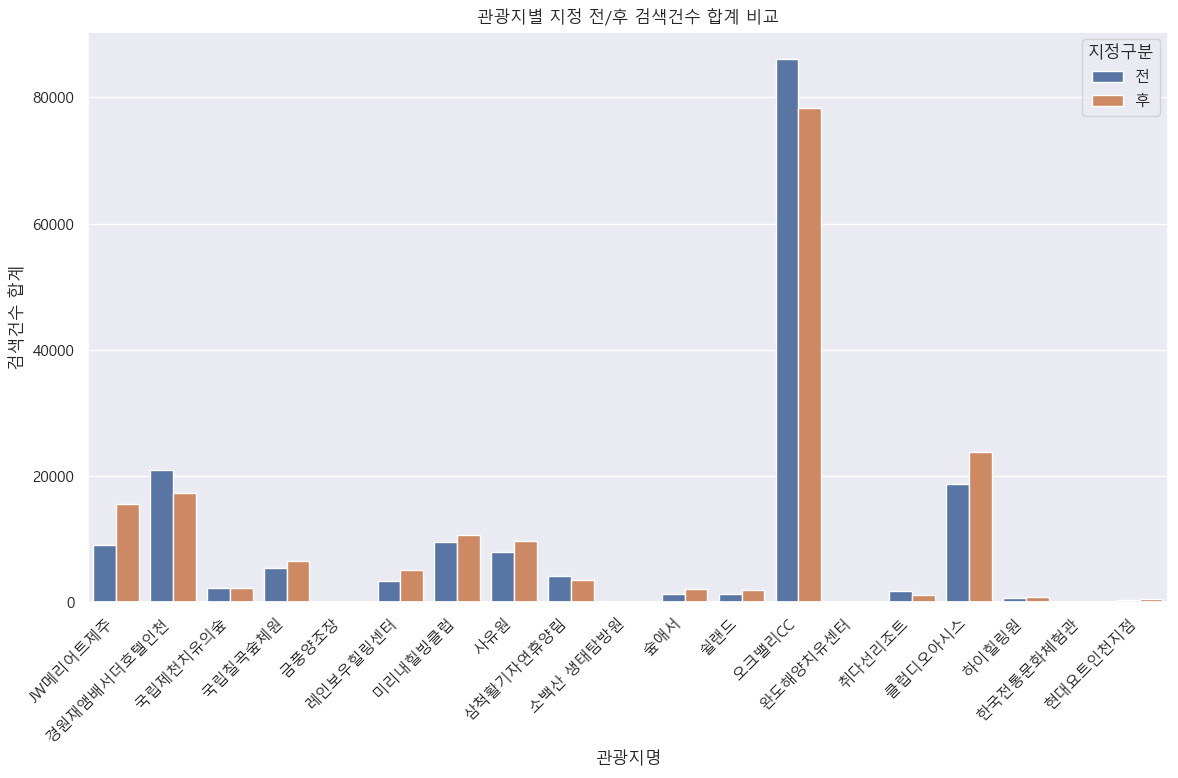

In [47]:
# 1) 기준 전/후별로 관광지명과 검색건수 합계 집계
agg_data = data.groupby(['관광지명', '지정구분'])['검색건수'].sum().reset_index()

# 2) seaborn 막대그래프 그리기
plt.figure(figsize=(12, 8))
sns.barplot(data=agg_data, x='관광지명', y='검색건수', hue='지정구분')

plt.title('관광지별 지정 전/후 검색건수 합계 비교')
plt.xlabel('관광지명')
plt.ylabel('검색건수 합계')
plt.xticks(rotation=45, ha='right')
plt.legend(title='지정구분')
plt.tight_layout()
plt.show()


In [50]:
# 기준 전/후별 관광지별 검색건수 합계 계산
agg_table = data.groupby(['관광지명', '지정구분'])['검색건수'].sum().unstack()

# 컬럼 이름이 '전', '후'로 나누어짐
agg_table = agg_table.rename(columns={'전': '검색건수_전', '후': '검색건수_후'})

# 결측치가 있으면 0으로 채우기 (예: 지정 전/후 중 없는 경우)
agg_table = agg_table.fillna(0).astype(int)

# 검색건수 변화 컬럼 추가
agg_table['검색건수_변화'] = agg_table['검색건수_후'] - agg_table['검색건수_전']

def change_label(x):
    if x > 0:
        return '증가'
    elif x < 0:
        return '감소'
    else:
        return '변화없음'

agg_table['변화상태'] = agg_table['검색건수_변화'].apply(change_label)

# 결과 출력
agg_table.reset_index(inplace=True)
agg_table


지정구분,관광지명,검색건수_전,검색건수_후,검색건수_변화,변화상태
0,JW메리어트제주,9073,15646,6573,증가
1,경원재앰배서더호텔인천,20913,17390,-3523,감소
2,국립제천치유의숲,2303,2272,-31,감소
3,국립칠곡숲체원,5381,6527,1146,증가
4,금풍양조장,0,0,0,변화없음
5,레인보우힐링센터,3436,5053,1617,증가
6,미리내힐빙클럽,9531,10665,1134,증가
7,사유원,7914,9649,1735,증가
8,삼척활기자연휴양림,4196,3499,-697,감소
9,소백산 생태탐방원,0,0,0,변화없음
